<a href="https://colab.research.google.com/github/engr-mrlw/First-NN-Tensorflow/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

We'll use the [Boston Housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) Dataset for this demo. This is an open-source dataset which contains information collected by the U.S Census Service concerning housing in the area of Boston.

Each samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s.
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per `$10,000`
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: percentage of lower status of the population

The targets are the median values of the houses at a location in 1000s of dollars.
* MEDV: Median value of owner-occupied homes in $1000's

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import boston_housing

In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
!ls


sample_data


In [6]:
print("Number of train samples: ", x_train.shape)
print("Number of test samples: ", x_test.shape)

Number of train samples:  (404, 13)
Number of test samples:  (102, 13)


In [6]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [8]:
print(x_train)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [7]:
y_train[0]

15.2

In [10]:
x_test[0]


array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [14]:
y_test[0]

7.2

# How to read csv file of Boston Housing data

In [8]:
import pandas as pd
import io

In [19]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [22]:
df = pd.read_csv(io.BytesIO(uploaded["BostonHousing.csv"]))
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [23]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


We'll use the MinMaxScaler from Scikit-learn library to perform the feature scaling. To know more about this normalizer, please refer to this [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()
mms.fit(x_train)

MinMaxScaler()

In [11]:
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [12]:
print(x_train)

[[1.37816304e-02 0.00000000e+00 2.81524927e-01 ... 8.93617021e-01
  1.00000000e+00 4.68818985e-01]
 [1.73654275e-04 8.25000000e-01 5.75513196e-02 ... 2.23404255e-01
  9.96167230e-01 3.80794702e-02]
 [5.49837765e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.46089061e-01 4.22185430e-02]
 ...
 [3.18534767e-04 3.50000000e-01 2.05278592e-01 ... 4.57446809e-01
  9.12627969e-01 1.68322296e-01]
 [2.40852297e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  6.59715568e-01 3.87969095e-01]
 [9.07048543e-05 6.00000000e-01 9.05425220e-02 ... 3.19148936e-01
  9.49064501e-01 7.31236203e-02]]


In [29]:
print(mms.data_max_)

[ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


In [30]:
print(mms.data_min_)

[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]


In [31]:
print(mms.data_range_)

[8.896988e+01 1.000000e+02 2.728000e+01 1.000000e+00 4.860000e-01
 5.164000e+00 9.710000e+01 9.580700e+00 2.300000e+01 5.230000e+02
 9.400000e+00 3.965800e+02 3.624000e+01]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(100, input_dim = 13, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [15]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,601 (45.32 KB)

 Trainable params: 11,601 (45.32 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 531.1119 - mae: 21.1105 - val_loss: 518.5336 - val_mae: 20.7538
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 431.3247 - mae: 18.4924 - val_loss: 394.4180 - val_mae: 17.3794
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 315.8395 - mae: 14.6740 - val_loss: 267.5006 - val_mae: 13.2821
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 234.9522 - mae: 11.7844 - val_loss: 190.0730 - val_mae: 10.8857
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 156.8119 - mae: 9.5770 - val_loss: 140.1779 - val_mae: 9.1914
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 118.2362 - mae: 7.9514 - val_loss: 116.6476 - val_mae: 8.2481
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98.9718 - mae: 7.2222 - val_loss: 97.7519 - val_mae: 7.4640
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.6272 - mae: 7.4728 - val_loss: 84.6648 - val_mae: 6.8188
Epoch 9/200
11/11 ━━━━━━━━━

In [36]:
len(hist.history['loss'])

200

In [43]:
range(1, len(hist.history['loss']) + 1)

range(1, 201)

In [37]:
hist.history['loss']

[527.4960327148438,
 416.48602294921875,
 295.9015197753906,
 198.7512969970703,
 145.4320831298828,
 119.4374008178711,
 103.80733489990234,
 89.26375579833984,
 77.79630279541016,
 69.051513671875,
 60.298561096191406,
 56.25910568237305,
 51.5249137878418,
 48.99280548095703,
 46.66775894165039,
 44.9661979675293,
 43.86188888549805,
 41.980133056640625,
 40.765201568603516,
 39.187870025634766,
 37.0848503112793,
 35.219966888427734,
 35.166664123535156,
 33.10652542114258,
 31.829313278198242,
 30.61532211303711,
 30.158336639404297,
 28.044429779052734,
 28.152427673339844,
 26.88431739807129,
 26.90111541748047,
 25.119346618652344,
 25.772451400756836,
 24.288557052612305,
 23.768596649169922,
 23.915851593017578,
 22.622365951538086,
 22.251354217529297,
 22.00099754333496,
 21.33487319946289,
 21.672710418701172,
 21.182037353515625,
 20.922012329101562,
 20.39764404296875,
 20.373428344726562,
 20.258359909057617,
 19.590028762817383,
 19.700284957885742,
 19.293672561645508

In [38]:
len(hist.history['val_loss'])

200

In [39]:
hist.history['val_loss']

[530.9391479492188,
 396.95306396484375,
 271.4863586425781,
 186.9904327392578,
 135.3492431640625,
 115.42150115966797,
 101.9872817993164,
 86.95164489746094,
 77.27649688720703,
 66.01171875,
 58.03342056274414,
 57.23361587524414,
 51.351341247558594,
 49.662532806396484,
 46.533958435058594,
 46.63867950439453,
 45.91851043701172,
 46.883705139160156,
 47.86863327026367,
 42.13930130004883,
 40.55226135253906,
 40.61919403076172,
 37.92656326293945,
 36.58186340332031,
 31.80850601196289,
 32.770111083984375,
 31.361988067626953,
 32.39037322998047,
 27.558988571166992,
 30.034038543701172,
 26.09945297241211,
 33.64413070678711,
 24.7824649810791,
 24.162946701049805,
 29.811870574951172,
 23.210041046142578,
 22.233642578125,
 21.853853225708008,
 21.279766082763672,
 23.488525390625,
 22.233057022094727,
 21.708797454833984,
 21.81698226928711,
 19.665353775024414,
 20.358171463012695,
 19.50382423400879,
 21.759185791015625,
 19.03459930419922,
 18.740041732788086,
 19.304691

In [44]:
range(1, len(hist.history['val_loss']) + 1)

range(1, 201)

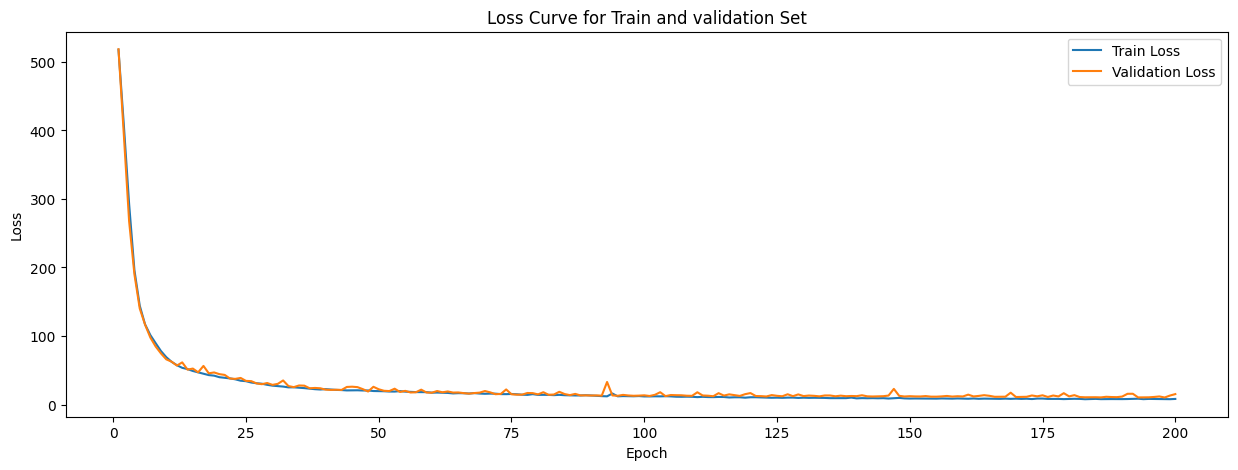

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1),
         hist.history['val_loss'])
plt.title('Loss Curve for Train and validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

In [41]:
len(hist.history['mae']) + 1

201

In [42]:
range(1, len(hist.history['mae']) + 1)

range(1, 201)

In [45]:
hist.history['mae']

[20.992259979248047,
 18.07331085205078,
 14.31817626953125,
 11.026773452758789,
 9.294146537780762,
 8.358519554138184,
 7.669137954711914,
 7.0116119384765625,
 6.4361748695373535,
 6.0077104568481445,
 5.465300559997559,
 5.4325103759765625,
 4.959755897521973,
 4.849286079406738,
 4.916499614715576,
 4.793840408325195,
 4.532680988311768,
 4.474167346954346,
 4.363949775695801,
 4.244015693664551,
 4.155673503875732,
 4.107460021972656,
 4.021920680999756,
 3.872413396835327,
 3.837623119354248,
 3.801240921020508,
 3.750053644180298,
 3.580627918243408,
 3.523711919784546,
 3.5714564323425293,
 3.5116026401519775,
 3.4493730068206787,
 3.4027140140533447,
 3.3741235733032227,
 3.3283846378326416,
 3.267317771911621,
 3.217914342880249,
 3.2005615234375,
 3.1790707111358643,
 3.1370174884796143,
 3.1736361980438232,
 3.14888072013855,
 3.050381898880005,
 3.0557971000671387,
 3.0979537963867188,
 3.0836868286132812,
 2.9902405738830566,
 3.033860445022583,
 3.011615514755249,
 3.0

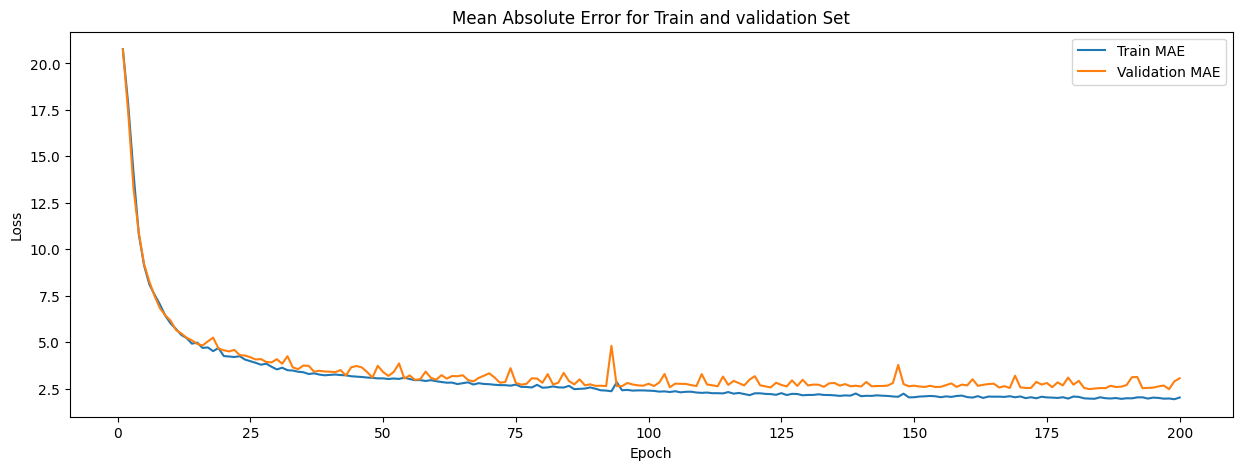

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1),
         hist.history['val_mae'])
plt.title('Mean Absolute Error for Train and validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train MAE', 'Validation MAE'])
plt.show()

In [47]:
len(result)

2

In [20]:
result = model.evaluate(x_test, y_test)
for i in range(len(result)):
    print(f'Test {model.metrics_names[i]} = {result[i]}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2486 - mae: 3.2737 
Test loss = 27.891382217407227
Test compile_metrics = 3.5445945262908936


We'll use r2_score from scikit-learn to calculate the r-square score for out model. To know more about this function, please go through this [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [21]:
from sklearn.metrics import r2_score

In [22]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [23]:
r2_score(y_test, y_pred)

0.6649436262881195